# Home Credit Default Risk

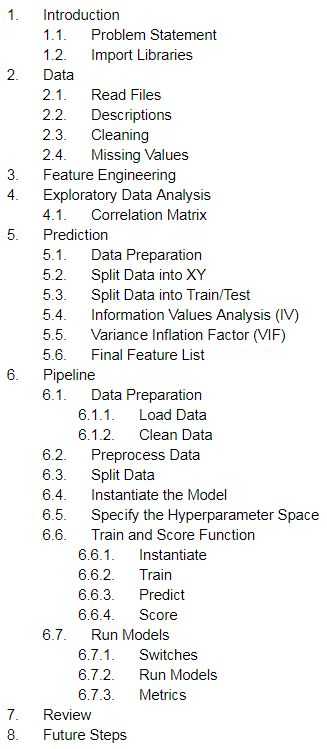

In [1]:
# outline picture
from IPython.display import Image
Image(filename='images/project_outline_2019_05_22.jpg')

# 1) Introduction

## <font color='blue'>1.1) Problem Statement</font>

Use alternative data to predict the repayment ability of people with insufficient or non-existent credit histories.

## <font color='blue'>1.2) Import Libraries</font>

In [2]:
# python packages used throughout the project

import chardet # check encoding for csv file

import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # suppress the warning globally

import matplotlib.pyplot as plt
import seaborn as sns

import os # for reading csv files
import glob # for reading csv files

import re # to search strings for nums

from functools import reduce # to combine final dfs into a single df

from sklearn.preprocessing import LabelEncoder # sklearn preprocessing for dealing with categorical variables

# 2) Data

## <font color='blue'>2.1) Read Files</font>

In [3]:
# create a dictionary with file names and their abbreviations

# abbreviations for each data file
data_abb_names = ['a_test', 
                  'a_train', 
                  'b', 
                  'bb', 
                  'ccb', 
                  'hccd', 
                  'ip', 
                  'pcb', 
                  'pa', 
                  'ss']

# file path for csv files
path = r'data/raw'

# list of file names to be read
data_file_names = glob.glob(os.path.join(path, "*.csv")) 

# dictionary of file name and abbreviation
data_file_abb = dict(zip(data_file_names, data_abb_names))

# don't need to import description file
data_file_abb.pop('data/raw\\HomeCredit_columns_description.csv', None)

data_file_abb

{'data/raw\\application_test.csv': 'a_test',
 'data/raw\\application_train.csv': 'a_train',
 'data/raw\\bureau.csv': 'b',
 'data/raw\\bureau_balance.csv': 'bb',
 'data/raw\\credit_card_balance.csv': 'ccb',
 'data/raw\\installments_payments.csv': 'ip',
 'data/raw\\POS_CASH_balance.csv': 'pcb',
 'data/raw\\previous_application.csv': 'pa',
 'data/raw\\sample_submission.csv': 'ss'}

In [4]:
# use a for loop to import data from csv files

for k, v in data_file_abb.items():
    print(k) # print file name and location
    
    df_name = data_file_abb[k] # use the abbreviation to name the df
    
    vars()[df_name] = pd.read_csv(k, # file name
                                  header=0, # first row has the column headers
                                  index_col=0, # first column has the index values
                                  nrows=10000) # read only n rows


data/raw\application_test.csv
data/raw\application_train.csv
data/raw\bureau.csv
data/raw\bureau_balance.csv
data/raw\credit_card_balance.csv
data/raw\installments_payments.csv
data/raw\POS_CASH_balance.csv
data/raw\previous_application.csv
data/raw\sample_submission.csv


## <font color='blue'>2.2) Data Descriptions</font>

In [ ]:
# column descriptions
# preview 5 rows
# info
# describe

In [5]:
# read decription csv

# check encoding for csv file
with open('data/raw\\HomeCredit_columns_description.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
# read file
descrip = pd.read_csv('data/raw\\HomeCredit_columns_description.csv', 
                 index_col=0, 
                 encoding=result['encoding'])
descrip = descrip.replace(np.nan, '', regex=True)
descrip.head()

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,
2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,
7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,


### <font color='green'>2.2.1) Application_test|train</font>

In [6]:
descrip[descrip['Table']=='application_{train|test}.csv'][['Row','Description','Special']]

,Row,Description,Special
1,SK_ID_CURR,ID of loan in our sample,
2,TARGET,Target variable (1 - client with payment diffi...,
5,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,
6,CODE_GENDER,Gender of the client,
7,FLAG_OWN_CAR,Flag if the client owns a car,
8,FLAG_OWN_REALTY,Flag if client owns a house or flat,
9,CNT_CHILDREN,Number of children the client has,
10,AMT_INCOME_TOTAL,Income of the client,
11,AMT_CREDIT,Credit amount of the loan,
12,AMT_ANNUITY,Loan annuity,


In [7]:
# application_train.csv
print("The training data has %s loan applications, with %s features, plus the target variable." \
      % (a_train.shape[0],a_train.shape[1]-1))
a_train.head()

The training data has 10000 loan applications, with 120 features, plus the target variable.


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# application_test.csv
print("The testing data has %s loan applications, with %s features, with no target variable." % (a_test.shape[0],a_test.shape[1]))
a_test.head()

The testing data has 10000 loan applications, with 120 features, with no target variable.


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='green'>2.2.2) Bureau</font>

In [9]:
descrip[descrip['Table']=='bureau.csv'][['Row','Description','Special']]

,Row,Description,Special
125,SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
126,SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
127,CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,
128,CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
129,DAYS_CREDIT,How many days before current application did c...,time only relative to the application
130,CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...,
131,DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...,time only relative to the application
132,DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...,time only relative to the application
133,AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...,
134,CNT_CREDIT_PROLONG,How many times was the Credit Bureau credit pr...,


In [10]:
# bureau.csv
b.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


### <font color='green'>2.2.3) Bureau Balance</font>

In [11]:
descrip[descrip['Table']=='bureau_balance.csv'][['Row','Description','Special']]

,Row,Description,Special
142,SK_BUREAU_ID,Recoded ID of Credit Bureau credit (unique cod...,hashed
143,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
144,STATUS,Status of Credit Bureau loan during the month ...,


In [12]:
# bureau_balance.csv
bb.head()

,MONTHS_BALANCE,STATUS
SK_ID_BUREAU,,
5715448,0,C
5715448,-1,C
5715448,-2,C
5715448,-3,C
5715448,-4,C


### <font color='green'>2.2.4) Credit Card Balance</font>

In [13]:
descrip[descrip['Table']=='credit_card_balance.csv'][['Row','Description','Special']]

,Row,Description,Special
153,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
154,SK_ID_CURR,ID of loan in our sample,hashed
155,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
156,AMT_BALANCE,Balance during the month of previous credit,
157,AMT_CREDIT_LIMIT_ACTUAL,Credit card limit during the month of the prev...,
158,AMT_DRAWINGS_ATM_CURRENT,Amount drawing at ATM during the month of the ...,
159,AMT_DRAWINGS_CURRENT,Amount drawing during the month of the previou...,
160,AMT_DRAWINGS_OTHER_CURRENT,Amount of other drawings during the month of t...,
161,AMT_DRAWINGS_POS_CURRENT,Amount drawing or buying goods during the mont...,
162,AMT_INST_MIN_REGULARITY,Minimal installment for this month of the prev...,


In [14]:
# credit_card_balance.csv
ccb.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


### <font color='green'>2.2.3) Installments Payments</font>

In [15]:
descrip[descrip['Table']=='installments_payments.csv'][['Row','Description','Special']]

,Row,Description,Special
214,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
215,SK_ID_CURR,ID of loan in our sample,hashed
216,NUM_INSTALMENT_VERSION,Version of installment calendar (0 is for cred...,
217,NUM_INSTALMENT_NUMBER,On which installment we observe payment,
218,DAYS_INSTALMENT,When the installment of previous credit was su...,time only relative to the application
219,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...,time only relative to the application
220,AMT_INSTALMENT,What was the prescribed installment amount of ...,
221,AMT_PAYMENT,What the client actually paid on previous cred...,


In [16]:
# installments_payments.csv
ip.head()

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,,,,,,,
1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


### <font color='green'>2.2.4) POS Cash Balance</font>

In [17]:
descrip[descrip['Table']=='POS_CASH_balance.csv'][['Row','Description','Special']]

,Row,Description,Special
145,SK_ID_PREV,ID of previous credit in Home Credit related t...,
146,SK_ID_CURR,ID of loan in our sample,
147,MONTHS_BALANCE,Month of balance relative to application date ...,time only relative to the application
148,CNT_INSTALMENT,Term of previous credit (can change over time),
149,CNT_INSTALMENT_FUTURE,Installments left to pay on the previous credit,
150,NAME_CONTRACT_STATUS,Contract status during the month,
151,SK_DPD,DPD (days past due) during the month of previo...,
152,SK_DPD_DEF,DPD during the month with tolerance (debts wit...,


In [18]:
# POS_CASH_balance.csv
pcb.head()

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,
1803195,182943,-31,48.0,45.0,Active,0,0
1715348,367990,-33,36.0,35.0,Active,0,0
1784872,397406,-32,12.0,9.0,Active,0,0
1903291,269225,-35,48.0,42.0,Active,0,0
2341044,334279,-35,36.0,35.0,Active,0,0


### <font color='green'>2.2.5) Previous Application</font>

In [19]:
descrip[descrip['Table']=='previous_application.csv'][['Row','Description','Special']]

,Row,Description,Special
176,SK_ID_PREV,ID of previous credit in Home credit related t...,hashed
177,SK_ID_CURR,ID of loan in our sample,hashed
178,NAME_CONTRACT_TYPE,"Contract product type (Cash loan, consumer loa...",
179,AMT_ANNUITY,Annuity of previous application,
180,AMT_APPLICATION,For how much credit did client ask on the prev...,
181,AMT_CREDIT,Final credit amount on the previous applicatio...,
182,AMT_DOWN_PAYMENT,Down payment on the previous application,
183,AMT_GOODS_PRICE,Goods price of good that client asked for (if ...,
184,WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply ...,
185,HOUR_APPR_PROCESS_START,Approximately at what day hour did the client ...,rounded


In [20]:
# previous_application.csv
pa.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='green'>2.2.6) Sample Submission</font>

Below is a sample submission for this project. The output includes the SK_ID_CURR and the associated TARGET output between 0 and 1.

In [21]:
# sample submission
ss.head()

,TARGET
SK_ID_CURR,
100001,0.5
100005,0.5
100013,0.5
100028,0.5
100038,0.5


## <font color='blue'>2.3) Cleaning</font>

### <font color='green'>2.3.1) Application_test|train</font>

In [94]:
# create an 'train_test' column in a_train and give the value 'train'
# create an 'train_test' column in a_train and give the value 'test'
# combine train and test datasets
# this way all the cleaning can be done at once, and then split at the end
# split data back into train/test df's using the 'train_test' column and remove the column

In [95]:
# create an 'train_test' column in a_train and give the value 'train'
a_train['train_test'] = 'train'

# create an 'train_test' column in a_train and give the value 'test'
a_test['train_test'] = 'test'

a = pd.concat([a_train, a_test])

print('a_train:', len(a_train))
print('a_test:',len(a_test))
print('a:',len(a))


a_train: 10000
a_test: 10000
a: 20000


In [96]:
a.head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,train_test
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341,train
100003,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040,train
100004,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,train
100006,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,train
100007,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,train


##### Column Types
1) Boolean - (1,0) actually an int value type

2) Categorical

In [22]:
a_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#list the columns
a_train_cols = list(a_train.columns)

# create a 'to-do' list of all the columns and remove them as they are reviewed
cols_to_clean = a_train_cols
len(cols_to_clean)

121

#### Boolean Columns:

In [24]:
# find all FLAG columns using their column headers
flag_cols = [x for x in a_train_cols if 'FLAG' in x]
flag_cols

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [25]:
# use the descriptions to look for more FLAG columns

# return a list of the descriptions for each of the cols
flag_cols_2 = list(descrip[descrip['Table']=='application_{train|test}.csv'].Description)

# convert all strings in list to lowercase
flag_cols_2 = [x.lower() for x in flag_cols_2]

# if 'flag' is in the string, keep it
flag_cols_2 = [x for x in flag_cols_2 if 'flag' in x]

flag_cols_2

['flag if the client owns a car',
 'flag if client owns a house or flat',
 "flag if client's permanent address does not match contact address (1=different, 0=same, at region level)",
 "flag if client's permanent address does not match work address (1=different, 0=same, at region level)",
 "flag if client's contact address does not match work address (1=different, 0=same, at region level)",
 "flag if client's permanent address does not match contact address (1=different, 0=same, at city level)",
 "flag if client's permanent address does not match work address (1=different, 0=same, at city level)",
 "flag if client's contact address does not match work address (1=different, 0=same, at city level)"]

In [26]:
flag_cols_2 = ['TARGET',
               'REG_REGION_NOT_LIVE_REGION',
               'REG_REGION_NOT_WORK_REGION',
               'LIVE_REGION_NOT_WORK_REGION',
               'REG_CITY_NOT_LIVE_CITY',
               'REG_CITY_NOT_WORK_CITY',
               'LIVE_CITY_NOT_WORK_CITY', 
               'EMERGENCYSTATE_MODE'
               ]

In [27]:
flag_cols += flag_cols_2
flag_cols

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'TARGET',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EMERGENCYSTATE_MODE']

In [28]:
# print columns and their unique values

for col in flag_cols:
    print(col, ':', a_train[col].unique())

FLAG_OWN_CAR : ['N' 'Y']
FLAG_OWN_REALTY : ['Y' 'N']
FLAG_MOBIL : [1]
FLAG_EMP_PHONE : [1 0]
FLAG_WORK_PHONE : [0 1]
FLAG_CONT_MOBILE : [1 0]
FLAG_PHONE : [1 0]
FLAG_EMAIL : [0 1]
FLAG_DOCUMENT_2 : [0]
FLAG_DOCUMENT_3 : [1 0]
FLAG_DOCUMENT_4 : [0 1]
FLAG_DOCUMENT_5 : [0 1]
FLAG_DOCUMENT_6 : [0 1]
FLAG_DOCUMENT_7 : [0]
FLAG_DOCUMENT_8 : [0 1]
FLAG_DOCUMENT_9 : [0 1]
FLAG_DOCUMENT_10 : [0]
FLAG_DOCUMENT_11 : [0 1]
FLAG_DOCUMENT_12 : [0]
FLAG_DOCUMENT_13 : [0 1]
FLAG_DOCUMENT_14 : [0 1]
FLAG_DOCUMENT_15 : [0 1]
FLAG_DOCUMENT_16 : [0 1]
FLAG_DOCUMENT_17 : [0 1]
FLAG_DOCUMENT_18 : [0 1]
FLAG_DOCUMENT_19 : [0 1]
FLAG_DOCUMENT_20 : [0 1]
FLAG_DOCUMENT_21 : [0 1]
TARGET : [1 0]
REG_REGION_NOT_LIVE_REGION : [0 1]
REG_REGION_NOT_WORK_REGION : [0 1]
LIVE_REGION_NOT_WORK_REGION : [0 1]
REG_CITY_NOT_LIVE_CITY : [0 1]
REG_CITY_NOT_WORK_CITY : [0 1]
LIVE_CITY_NOT_WORK_CITY : [0 1]
EMERGENCYSTATE_MODE : ['No' nan 'Yes']


In [29]:
# convert Y and N into 1 an 0
a_train[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']] = a_train[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].replace({'Y': 1, 'N': 0})
a_train['EMERGENCYSTATE_MODE'] = a_train['EMERGENCYSTATE_MODE'].replace({'Yes': 1, 'No': 0})

In [30]:
# print FLAG columns and their unique values
# confirm all FLAG type columns are 0 & 1

for col in flag_cols:
    print(col, ':', a_train[col].unique())

FLAG_OWN_CAR : [0 1]
FLAG_OWN_REALTY : [1 0]
FLAG_MOBIL : [1]
FLAG_EMP_PHONE : [1 0]
FLAG_WORK_PHONE : [0 1]
FLAG_CONT_MOBILE : [1 0]
FLAG_PHONE : [1 0]
FLAG_EMAIL : [0 1]
FLAG_DOCUMENT_2 : [0]
FLAG_DOCUMENT_3 : [1 0]
FLAG_DOCUMENT_4 : [0 1]
FLAG_DOCUMENT_5 : [0 1]
FLAG_DOCUMENT_6 : [0 1]
FLAG_DOCUMENT_7 : [0]
FLAG_DOCUMENT_8 : [0 1]
FLAG_DOCUMENT_9 : [0 1]
FLAG_DOCUMENT_10 : [0]
FLAG_DOCUMENT_11 : [0 1]
FLAG_DOCUMENT_12 : [0]
FLAG_DOCUMENT_13 : [0 1]
FLAG_DOCUMENT_14 : [0 1]
FLAG_DOCUMENT_15 : [0 1]
FLAG_DOCUMENT_16 : [0 1]
FLAG_DOCUMENT_17 : [0 1]
FLAG_DOCUMENT_18 : [0 1]
FLAG_DOCUMENT_19 : [0 1]
FLAG_DOCUMENT_20 : [0 1]
FLAG_DOCUMENT_21 : [0 1]
TARGET : [1 0]
REG_REGION_NOT_LIVE_REGION : [0 1]
REG_REGION_NOT_WORK_REGION : [0 1]
LIVE_REGION_NOT_WORK_REGION : [0 1]
REG_CITY_NOT_LIVE_CITY : [0 1]
REG_CITY_NOT_WORK_CITY : [0 1]
LIVE_CITY_NOT_WORK_CITY : [0 1]
EMERGENCYSTATE_MODE : [  0.  nan   1.]


In [31]:
# confirm all FLAG type columns are int64 or float64
a_train[flag_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100002 to 111633
Data columns (total 36 columns):
FLAG_OWN_CAR                   10000 non-null int64
FLAG_OWN_REALTY                10000 non-null int64
FLAG_MOBIL                     10000 non-null int64
FLAG_EMP_PHONE                 10000 non-null int64
FLAG_WORK_PHONE                10000 non-null int64
FLAG_CONT_MOBILE               10000 non-null int64
FLAG_PHONE                     10000 non-null int64
FLAG_EMAIL                     10000 non-null int64
FLAG_DOCUMENT_2                10000 non-null int64
FLAG_DOCUMENT_3                10000 non-null int64
FLAG_DOCUMENT_4                10000 non-null int64
FLAG_DOCUMENT_5                10000 non-null int64
FLAG_DOCUMENT_6                10000 non-null int64
FLAG_DOCUMENT_7                10000 non-null int64
FLAG_DOCUMENT_8                10000 non-null int64
FLAG_DOCUMENT_9                10000 non-null int64
FLAG_DOCUMENT_10               10000 non-null int64
F

In [32]:
a_train['EMERGENCYSTATE_MODE'].isna().sum()

4725

In [33]:
# remove adjusted cols from 'cols to clean'

cols_to_clean = [x for x in cols_to_clean if x not in flag_cols]
len(cols_to_clean)

85

#### Categorical Columns

In [34]:
# find all NAME and TYPE columns using their column headers

name_cols = [x for x in a_train_cols if 'NAME' in x]
type_cols = [x for x in a_train_cols if 'TYPE' in x]

In [35]:
# combine the lists

cat_cols = name_cols + type_cols
cat_cols += ['CODE_GENDER', 
            'WEEKDAY_APPR_PROCESS_START', 
            'FONDKAPREMONT_MODE', 
            'WALLSMATERIAL_MODE',
            'REGION_RATING_CLIENT',
            'REGION_RATING_CLIENT_W_CITY']

cat_cols = list(dict.fromkeys(cat_cols)) # remove duplicates
cat_cols

['NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'CODE_GENDER',
 'WEEKDAY_APPR_PROCESS_START',
 'FONDKAPREMONT_MODE',
 'WALLSMATERIAL_MODE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

In [36]:
# print NAME or TYPE columns and their unique values

for col in cat_cols:
    print(col, ':', a_train[col].unique())

NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed']
NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE : ['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
ORGANIZATION_TYPE : ['Business Entity Type 3' 'School' 'Gover

In [37]:
# print NAME or TYPE columns and the num of unique values

for col in cat_cols:
    print(col, ':', len(a_train[col].unique()))

NAME_CONTRACT_TYPE : 2
NAME_TYPE_SUITE : 8
NAME_INCOME_TYPE : 5
NAME_EDUCATION_TYPE : 5
NAME_FAMILY_STATUS : 5
NAME_HOUSING_TYPE : 6
OCCUPATION_TYPE : 19
ORGANIZATION_TYPE : 58
HOUSETYPE_MODE : 4
CODE_GENDER : 2
WEEKDAY_APPR_PROCESS_START : 7
FONDKAPREMONT_MODE : 5
WALLSMATERIAL_MODE : 8
REGION_RATING_CLIENT : 3
REGION_RATING_CLIENT_W_CITY : 3


In [38]:
a_train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100002 to 111633
Data columns (total 15 columns):
NAME_CONTRACT_TYPE             10000 non-null object
NAME_TYPE_SUITE                9959 non-null object
NAME_INCOME_TYPE               10000 non-null object
NAME_EDUCATION_TYPE            10000 non-null object
NAME_FAMILY_STATUS             10000 non-null object
NAME_HOUSING_TYPE              10000 non-null object
OCCUPATION_TYPE                6911 non-null object
ORGANIZATION_TYPE              10000 non-null object
HOUSETYPE_MODE                 4995 non-null object
CODE_GENDER                    10000 non-null object
WEEKDAY_APPR_PROCESS_START     10000 non-null object
FONDKAPREMONT_MODE             3143 non-null object
WALLSMATERIAL_MODE             4911 non-null object
REGION_RATING_CLIENT           10000 non-null int64
REGION_RATING_CLIENT_W_CITY    10000 non-null int64
dtypes: int64(2), object(13)
memory usage: 1.2+ MB


In [39]:
# convert cat_cols into categorical data
#### Categorical Columns
for col in cat_cols:
    a_train[col] = pd.Categorical(a_train[col])

a_train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100002 to 111633
Data columns (total 15 columns):
NAME_CONTRACT_TYPE             10000 non-null category
NAME_TYPE_SUITE                9959 non-null category
NAME_INCOME_TYPE               10000 non-null category
NAME_EDUCATION_TYPE            10000 non-null category
NAME_FAMILY_STATUS             10000 non-null category
NAME_HOUSING_TYPE              10000 non-null category
OCCUPATION_TYPE                6911 non-null category
ORGANIZATION_TYPE              10000 non-null category
HOUSETYPE_MODE                 4995 non-null category
CODE_GENDER                    10000 non-null category
WEEKDAY_APPR_PROCESS_START     10000 non-null category
FONDKAPREMONT_MODE             3143 non-null category
WALLSMATERIAL_MODE             4911 non-null category
REGION_RATING_CLIENT           10000 non-null category
REGION_RATING_CLIENT_W_CITY    10000 non-null category
dtypes: category(15)
memory usage: 230.9 KB


In [40]:
# remove adjusted cols from 'cols to clean'

cols_to_clean = [x for x in cols_to_clean if x not in cat_cols]
len(cols_to_clean)

70

In [41]:
# convert the same columns for a_test as well

# convert Y and N into 1 an 0
a_test[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']] = a_test[['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']].replace({'Y': 1, 'N': 0})
a_test['EMERGENCYSTATE_MODE'] = a_test['EMERGENCYSTATE_MODE'].replace({'Yes': 1, 'No': 0})

for col in cat_cols:
    a_test[col] = pd.Categorical(a_test[col])

In [42]:
flag_cols_tar = flag_cols
flag_cols_tar.remove('TARGET')

a_test[flag_cols_tar].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100001 to 172574
Data columns (total 35 columns):
FLAG_OWN_CAR                   10000 non-null int64
FLAG_OWN_REALTY                10000 non-null int64
FLAG_MOBIL                     10000 non-null int64
FLAG_EMP_PHONE                 10000 non-null int64
FLAG_WORK_PHONE                10000 non-null int64
FLAG_CONT_MOBILE               10000 non-null int64
FLAG_PHONE                     10000 non-null int64
FLAG_EMAIL                     10000 non-null int64
FLAG_DOCUMENT_2                10000 non-null int64
FLAG_DOCUMENT_3                10000 non-null int64
FLAG_DOCUMENT_4                10000 non-null int64
FLAG_DOCUMENT_5                10000 non-null int64
FLAG_DOCUMENT_6                10000 non-null int64
FLAG_DOCUMENT_7                10000 non-null int64
FLAG_DOCUMENT_8                10000 non-null int64
FLAG_DOCUMENT_9                10000 non-null int64
FLAG_DOCUMENT_10               10000 non-null int64
F

In [43]:
a_test['EMERGENCYSTATE_MODE'].isna().sum()

4617

In [44]:
a_test[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100001 to 172574
Data columns (total 15 columns):
NAME_CONTRACT_TYPE             10000 non-null category
NAME_TYPE_SUITE                9816 non-null category
NAME_INCOME_TYPE               10000 non-null category
NAME_EDUCATION_TYPE            10000 non-null category
NAME_FAMILY_STATUS             10000 non-null category
NAME_HOUSING_TYPE              10000 non-null category
OCCUPATION_TYPE                6788 non-null category
ORGANIZATION_TYPE              10000 non-null category
HOUSETYPE_MODE                 5087 non-null category
CODE_GENDER                    10000 non-null category
WEEKDAY_APPR_PROCESS_START     10000 non-null category
FONDKAPREMONT_MODE             3224 non-null category
WALLSMATERIAL_MODE             5065 non-null category
REGION_RATING_CLIENT           10000 non-null category
REGION_RATING_CLIENT_W_CITY    10000 non-null category
dtypes: category(15)
memory usage: 230.9 KB


### <font color='green'>2.3.2) Bureau</font>

In [45]:
b.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [46]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 215354 to 215641
Data columns (total 16 columns):
SK_ID_BUREAU              10000 non-null int64
CREDIT_ACTIVE             10000 non-null object
CREDIT_CURRENCY           10000 non-null object
DAYS_CREDIT               10000 non-null int64
CREDIT_DAY_OVERDUE        10000 non-null int64
DAYS_CREDIT_ENDDATE       9369 non-null float64
DAYS_ENDDATE_FACT         6229 non-null float64
AMT_CREDIT_MAX_OVERDUE    3595 non-null float64
CNT_CREDIT_PROLONG        10000 non-null int64
AMT_CREDIT_SUM            10000 non-null float64
AMT_CREDIT_SUM_DEBT       8460 non-null float64
AMT_CREDIT_SUM_LIMIT      6550 non-null float64
AMT_CREDIT_SUM_OVERDUE    10000 non-null float64
CREDIT_TYPE               10000 non-null object
DAYS_CREDIT_UPDATE        10000 non-null int64
AMT_ANNUITY               1834 non-null float64
dtypes: float64(8), int64(5), object(3)
memory usage: 1.3+ MB


In [47]:
# print columns and the num of unique values

for col in b.columns:
    print(col, ':', len(b[col].unique()))

SK_ID_BUREAU : 10000
CREDIT_ACTIVE : 4
CREDIT_CURRENCY : 3
DAYS_CREDIT : 2698
CREDIT_DAY_OVERDUE : 40
DAYS_CREDIT_ENDDATE : 3930
DAYS_ENDDATE_FACT : 2252
AMT_CREDIT_MAX_OVERDUE : 757
CNT_CREDIT_PROLONG : 5
AMT_CREDIT_SUM : 4842
AMT_CREDIT_SUM_DEBT : 2526
AMT_CREDIT_SUM_LIMIT : 400
AMT_CREDIT_SUM_OVERDUE : 41
CREDIT_TYPE : 10
DAYS_CREDIT_UPDATE : 2063
AMT_ANNUITY : 643


In [48]:
# print columns and their unique values

for col in b.columns:
    print(col, ':', b[col].unique())

SK_ID_BUREAU : [5714462 5714463 5714464 ..., 5726629 5726630 5726631]
CREDIT_ACTIVE : ['Closed' 'Active' 'Sold' 'Bad debt']
CREDIT_CURRENCY : ['currency 1' 'currency 2' 'currency 4']
DAYS_CREDIT : [ -497  -208  -203 ..., -2907  -881 -1020]
CREDIT_DAY_OVERDUE : [   0 2603    6   30 2156  496  186 2264   41    8   71   13  252 1201   12
   38 1777  150   18   37   64 2050    9    4   29   22   49 1930   34  951
  936  664   45 2625  837   21   15   31 1715   19]
DAYS_CREDIT_ENDDATE : [ -153.  1075.   528. ..., -1055.  5210.  2683.]
DAYS_ENDDATE_FACT : [ -153.    nan -1710. ..., -1356.  -981.  -623.]
AMT_CREDIT_MAX_OVERDUE : [             nan   7.76745000e+04   0.00000000e+00   1.49850000e+04
   3.10500000e+02   2.04932700e+04   8.88210000e+04   1.35000000e+03
   3.98052000e+03   1.80000000e+03   1.82932650e+04   1.26180000e+04
   4.05000000e+01   6.00750000e+03   1.12500000e+04   6.49242000e+03
   3.28500000e+03   1.70478000e+03   3.72789000e+03   1.35900000e+04
   2.18920500e+03   1.322

AMT_CREDIT_SUM : [  91323.   225000.   464323.5 ...,   87727.5   26284.5   27072. ]
AMT_CREDIT_SUM_DEBT : [      0.     171342.            nan ...,   89912.025  542038.905  648477.   ]
AMT_CREDIT_SUM_LIMIT : [             nan   1.08982620e+05   0.00000000e+00   2.28320100e+05
   4.11615000e+02   1.21690170e+05   1.37692170e+05   1.35149040e+05
   2.56500000e+00   9.49036050e+04   5.39626950e+04   1.35000000e+05
   2.25701280e+05   4.50000000e+03   6.70563000e+03   9.80280000e+02
   3.64500000e+05   4.53600000e+01   7.65900000e+01   1.63876500e+03
   2.21228100e+04   1.35638100e+05   3.37515255e+05   7.82303400e+04
   1.70509500e+03   1.80455805e+05   1.35045000e+05   2.48431050e+04
   6.79008600e+04   9.71763750e+04   2.85651900e+04   6.75000000e+04
   2.55746700e+04   5.90837850e+04   7.19449650e+04   5.52432600e+04
   2.25000000e+04   9.00000000e+04   5.55861600e+04   1.21455360e+05
   5.85000000e+04   9.01575000e+04   8.29800000e+03   7.86375000e+02
   1.91251215e+05   2.70000000e+0

#### Categorical Columns

In [49]:
cat_cols = ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

# convert cat_cols into categorical data

for col in cat_cols:
    b[col] = pd.Categorical(b[col])


In [50]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 215354 to 215641
Data columns (total 16 columns):
SK_ID_BUREAU              10000 non-null int64
CREDIT_ACTIVE             10000 non-null category
CREDIT_CURRENCY           10000 non-null category
DAYS_CREDIT               10000 non-null int64
CREDIT_DAY_OVERDUE        10000 non-null int64
DAYS_CREDIT_ENDDATE       9369 non-null float64
DAYS_ENDDATE_FACT         6229 non-null float64
AMT_CREDIT_MAX_OVERDUE    3595 non-null float64
CNT_CREDIT_PROLONG        10000 non-null int64
AMT_CREDIT_SUM            10000 non-null float64
AMT_CREDIT_SUM_DEBT       8460 non-null float64
AMT_CREDIT_SUM_LIMIT      6550 non-null float64
AMT_CREDIT_SUM_OVERDUE    10000 non-null float64
CREDIT_TYPE               10000 non-null category
DAYS_CREDIT_UPDATE        10000 non-null int64
AMT_ANNUITY               1834 non-null float64
dtypes: category(3), float64(8), int64(5)
memory usage: 1.1 MB


### <font color='green'>2.3.3) Bureau Balance</font>

In [51]:
bb.head()

,MONTHS_BALANCE,STATUS
SK_ID_BUREAU,,
5715448,0,C
5715448,-1,C
5715448,-2,C
5715448,-3,C
5715448,-4,C


In [52]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5715448 to 5720034
Data columns (total 2 columns):
MONTHS_BALANCE    10000 non-null int64
STATUS            10000 non-null object
dtypes: int64(1), object(1)
memory usage: 234.4+ KB


In [53]:
# print columns and the num of unique values

for col in bb.columns:
    print(col, ':', len(bb[col].unique()))

MONTHS_BALANCE : 97
STATUS : 6


In [54]:
# print columns and their unique values

for col in bb.columns:
    print(col, ':', bb[col].unique())

MONTHS_BALANCE : [  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31 -32 -33 -34 -35
 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49 -50 -51 -52 -53
 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67 -68 -69 -70 -71
 -72 -73 -74 -75 -76 -77 -78 -79 -80 -81 -82 -83 -84 -85 -86 -87 -88 -89
 -90 -91 -92 -93 -94 -95 -96]
STATUS : ['C' '0' 'X' '1' '2' '3']


In [55]:
# convert cat_cols into categorical data

bb['STATUS'] = pd.Categorical(bb['STATUS'])

In [56]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5715448 to 5720034
Data columns (total 2 columns):
MONTHS_BALANCE    10000 non-null int64
STATUS            10000 non-null category
dtypes: category(1), int64(1)
memory usage: 166.2 KB


### <font color='green'>2.3.4) Credit Card Balance</font>

In [57]:
ccb.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [58]:
ccb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2562384 to 1669462
Data columns (total 22 columns):
SK_ID_CURR                    10000 non-null int64
MONTHS_BALANCE                10000 non-null int64
AMT_BALANCE                   10000 non-null float64
AMT_CREDIT_LIMIT_ACTUAL       10000 non-null int64
AMT_DRAWINGS_ATM_CURRENT      7933 non-null float64
AMT_DRAWINGS_CURRENT          10000 non-null float64
AMT_DRAWINGS_OTHER_CURRENT    7933 non-null float64
AMT_DRAWINGS_POS_CURRENT      7933 non-null float64
AMT_INST_MIN_REGULARITY       9674 non-null float64
AMT_PAYMENT_CURRENT           7952 non-null float64
AMT_PAYMENT_TOTAL_CURRENT     10000 non-null float64
AMT_RECEIVABLE_PRINCIPAL      10000 non-null float64
AMT_RECIVABLE                 10000 non-null float64
AMT_TOTAL_RECEIVABLE          10000 non-null float64
CNT_DRAWINGS_ATM_CURRENT      7933 non-null float64
CNT_DRAWINGS_CURRENT          10000 non-null int64
CNT_DRAWINGS_OTHER_CURRENT    7933 non-null float

In [59]:
# print columns and the num of unique values

for col in ccb.columns:
    print(col, ':', len(ccb[col].unique()))

SK_ID_CURR : 9520
MONTHS_BALANCE : 69
AMT_BALANCE : 4495
AMT_CREDIT_LIMIT_ACTUAL : 55
AMT_DRAWINGS_ATM_CURRENT : 166
AMT_DRAWINGS_CURRENT : 1231
AMT_DRAWINGS_OTHER_CURRENT : 31
AMT_DRAWINGS_POS_CURRENT : 1067
AMT_INST_MIN_REGULARITY : 2527
AMT_PAYMENT_CURRENT : 2990
AMT_PAYMENT_TOTAL_CURRENT : 1680
AMT_RECEIVABLE_PRINCIPAL : 4231
AMT_RECIVABLE : 4369
AMT_TOTAL_RECEIVABLE : 4369
CNT_DRAWINGS_ATM_CURRENT : 17
CNT_DRAWINGS_CURRENT : 52
CNT_DRAWINGS_OTHER_CURRENT : 5
CNT_DRAWINGS_POS_CURRENT : 53
CNT_INSTALMENT_MATURE_CUM : 113
NAME_CONTRACT_STATUS : 5
SK_DPD : 57
SK_DPD_DEF : 6


In [60]:
# print columns and their unique values

for col in ccb.columns:
    print(col, ':', ccb[col].unique())

SK_ID_CURR : [378907 363914 371185 ..., 397003 311063 289406]
MONTHS_BALANCE : [ -6  -1  -7  -4  -5  -3  -2 -19 -13 -18 -15 -12 -22 -16 -21 -14 -20 -17
 -11 -52 -54 -58 -53 -51 -50 -59 -56 -57 -60 -55 -26 -25 -24 -23 -67 -64
 -62 -63 -61 -65 -66 -10  -9 -88 -95 -86 -89 -91 -93 -87 -90 -92 -94 -85
 -72 -73 -70 -69 -68 -71 -74  -8 -27 -80 -79 -84 -83 -81 -82]
AMT_BALANCE : [  5.69700000e+01   6.39755550e+04   3.18152250e+04 ...,   8.71839000e+04
   8.50992300e+04   7.66159200e+04]
AMT_CREDIT_LIMIT_ACTUAL : [ 135000   45000  450000  225000  270000  585000  292500  180000   67500
       0  157500  360000  540000  558000  202500  247500  112500   90000
  720000  315000  900000   22500  675000  855000  382500  495000  337500
  765000  405000  108000  630000  810000  427500  261000  229500   27000
   81000  216000  103500   58500  468000  342000   94500  274500  234000
  130500  400500    4500   36000  306000 1125000   72000   54000   63000
  162000]
AMT_DRAWINGS_ATM_CURRENT : [  0.00000000e+

In [61]:
# categoricial column(s)
ccb['NAME_CONTRACT_STATUS'] = pd.Categorical(ccb['NAME_CONTRACT_STATUS'])

### <font color='green'>2.3.5) Previous Application</font>

In [62]:
pa.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,,,,,,,,,,,,,,,,,,,,,
2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
pa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2030495 to 2744934
Data columns (total 36 columns):
SK_ID_CURR                     10000 non-null int64
NAME_CONTRACT_TYPE             10000 non-null object
AMT_ANNUITY                    7915 non-null float64
AMT_APPLICATION                10000 non-null float64
AMT_CREDIT                     10000 non-null float64
AMT_DOWN_PAYMENT               4954 non-null float64
AMT_GOODS_PRICE                7878 non-null float64
WEEKDAY_APPR_PROCESS_START     10000 non-null object
HOUR_APPR_PROCESS_START        10000 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    10000 non-null object
NFLAG_LAST_APPL_IN_DAY         10000 non-null int64
RATE_DOWN_PAYMENT              4954 non-null float64
RATE_INTEREST_PRIMARY          37 non-null float64
RATE_INTEREST_PRIVILEGED       37 non-null float64
NAME_CASH_LOAN_PURPOSE         10000 non-null object
NAME_CONTRACT_STATUS           10000 non-null object
DAYS_DECISION                  10000 non

In [64]:
# print columns and the num of unique values

for col in pa.columns:
    print(col, ':', len(pa[col].unique()))

SK_ID_CURR : 9734
NAME_CONTRACT_TYPE : 4
AMT_ANNUITY : 6598
AMT_APPLICATION : 3884
AMT_CREDIT : 5313
AMT_DOWN_PAYMENT : 1380
AMT_GOODS_PRICE : 3885
WEEKDAY_APPR_PROCESS_START : 7
HOUR_APPR_PROCESS_START : 22
FLAG_LAST_APPL_PER_CONTRACT : 2
NFLAG_LAST_APPL_IN_DAY : 2
RATE_DOWN_PAYMENT : 2240
RATE_INTEREST_PRIMARY : 16
RATE_INTEREST_PRIVILEGED : 8
NAME_CASH_LOAN_PURPOSE : 23
NAME_CONTRACT_STATUS : 4
DAYS_DECISION : 2544
NAME_PAYMENT_TYPE : 4
CODE_REJECT_REASON : 8
NAME_TYPE_SUITE : 8
NAME_CLIENT_TYPE : 4
NAME_GOODS_CATEGORY : 24
NAME_PORTFOLIO : 5
NAME_PRODUCT_TYPE : 3
CHANNEL_TYPE : 8
SELLERPLACE_AREA : 697
NAME_SELLER_INDUSTRY : 11
CNT_PAYMENT : 27
NAME_YIELD_GROUP : 5
PRODUCT_COMBINATION : 18
DAYS_FIRST_DRAWING : 315
DAYS_FIRST_DUE : 2337
DAYS_LAST_DUE_1ST_VERSION : 2711
DAYS_LAST_DUE : 2106
DAYS_TERMINATION : 2040
NFLAG_INSURED_ON_APPROVAL : 3


In [65]:
# print columns and their unique values

for col in pa.columns:
    print(col, ':', pa[col].unique())

SK_ID_CURR : [271877 108129 122040 ..., 202061 233764 277168]
NAME_CONTRACT_TYPE : ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
AMT_ANNUITY : [  1730.43   25188.615  15060.735 ...,   2791.935  42176.295   7395.48 ]
AMT_APPLICATION : [  17145.  607500.  112500. ...,  283500.  131400.   16875.]
AMT_CREDIT : [   17145.    679671.    136444.5 ...,  1211503.5   140071.5    14625. ]
AMT_DOWN_PAYMENT : [     0.       nan  12649.5 ...,   7164.    2340.   12307.5]
AMT_GOODS_PRICE : [  17145.  607500.  112500. ...,  283500.  131400.   16875.]
WEEKDAY_APPR_PROCESS_START : ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
HOUR_APPR_PROCESS_START : [15 11  7  9  8 10 12 13 14 16  6  4  5 19 17 18 20 22 21  3  1  2]
FLAG_LAST_APPL_PER_CONTRACT : ['Y' 'N']
NFLAG_LAST_APPL_IN_DAY : [1 0]
RATE_DOWN_PAYMENT : [ 0.                 nan  0.10397129 ...,  0.09947447  0.14587341
  0.14521212]
RATE_INTEREST_PRIMARY : [ 0.1828318          nan  0.19691431  0.18913635  0.6956675

In [66]:
# cols to convert type

cat_cols = ['NAME_CONTRACT_TYPE', 
            'WEEKDAY_APPR_PROCESS_START', 
            'NAME_CASH_LOAN_PURPOSE', 
            'NAME_CONTRACT_STATUS',
            'NAME_PAYMENT_TYPE', 
            'CODE_REJECT_REASON', 
            'NAME_TYPE_SUITE', 
            'NAME_CLIENT_TYPE', 
            'NAME_GOODS_CATEGORY',
            'NAME_PORTFOLIO', 
            'NAME_PRODUCT_TYPE', 
            'CHANNEL_TYPE', 
            'NAME_SELLER_INDUSTRY', 
            'NAME_YIELD_GROUP', 
            'PRODUCT_COMBINATION']

flag_cols = ['FLAG_LAST_APPL_PER_CONTRACT']


In [67]:
# categoricial column(s)
pa[cat_cols] = pd.Categorical(pa[cat_cols])

In [68]:
# convert Y and N into 1 an 0
pa[flag_cols] = pa[flag_cols].replace({'Y': 1, 'N': 0})

pa[flag_cols].head()

,FLAG_LAST_APPL_PER_CONTRACT
SK_ID_PREV,
2030495,1
2802425,1
2523466,1
2819243,1
1784265,1


### <font color='green'>2.3.6) Sample Submission</font>

In [69]:
ss.head()

,TARGET
SK_ID_CURR,
100001,0.5
100005,0.5
100013,0.5
100028,0.5
100038,0.5


In [70]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100001 to 172574
Data columns (total 1 columns):
TARGET    10000 non-null float64
dtypes: float64(1)
memory usage: 156.2 KB


## <font color='blue'>2.4) Missing Values</font>

### <font color='green'>2.4.1) Application_test|train</font>

In [71]:
# info for columns with missing data
a_train[a_train.columns[a_train.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100002 to 111633
Data columns (total 64 columns):
AMT_GOODS_PRICE                 9993 non-null float64
NAME_TYPE_SUITE                 9959 non-null category
OWN_CAR_AGE                     3338 non-null float64
OCCUPATION_TYPE                 6911 non-null category
EXT_SOURCE_1                    4353 non-null float64
EXT_SOURCE_2                    9974 non-null float64
EXT_SOURCE_3                    8005 non-null float64
APARTMENTS_AVG                  4935 non-null float64
BASEMENTAREA_AVG                4184 non-null float64
YEARS_BEGINEXPLUATATION_AVG     5120 non-null float64
YEARS_BUILD_AVG                 3360 non-null float64
COMMONAREA_AVG                  3021 non-null float64
ELEVATORS_AVG                   4691 non-null float64
ENTRANCES_AVG                   4994 non-null float64
FLOORSMAX_AVG                   5057 non-null float64
FLOORSMIN_AVG                   3205 non-null float64
LANDAREA_AVG       

In [72]:
# info for columns with missing data
a_test[a_test.columns[a_test.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100001 to 172574
Data columns (total 64 columns):
AMT_ANNUITY                     9990 non-null float64
NAME_TYPE_SUITE                 9816 non-null category
OWN_CAR_AGE                     3324 non-null float64
OCCUPATION_TYPE                 6788 non-null category
EXT_SOURCE_1                    5739 non-null float64
EXT_SOURCE_2                    9999 non-null float64
EXT_SOURCE_3                    8230 non-null float64
APARTMENTS_AVG                  5055 non-null float64
BASEMENTAREA_AVG                4276 non-null float64
YEARS_BEGINEXPLUATATION_AVG     5262 non-null float64
YEARS_BUILD_AVG                 3428 non-null float64
COMMONAREA_AVG                  3125 non-null float64
ELEVATORS_AVG                   4805 non-null float64
ENTRANCES_AVG                   5120 non-null float64
FLOORSMAX_AVG                   5176 non-null float64
FLOORSMIN_AVG                   3291 non-null float64
LANDAREA_AVG       

### <font color='green'>2.4.2) Bureau</font>

In [73]:
# info for columns with missing data
b[b.columns[b.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 215354 to 215641
Data columns (total 6 columns):
DAYS_CREDIT_ENDDATE       9369 non-null float64
DAYS_ENDDATE_FACT         6229 non-null float64
AMT_CREDIT_MAX_OVERDUE    3595 non-null float64
AMT_CREDIT_SUM_DEBT       8460 non-null float64
AMT_CREDIT_SUM_LIMIT      6550 non-null float64
AMT_ANNUITY               1834 non-null float64
dtypes: float64(6)
memory usage: 546.9 KB


### <font color='green'>2.4.3) Bureau Balance</font>

In [74]:
# info for columns with missing data
bb[bb.columns[bb.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5715448 to 5720034
Empty DataFrame

### <font color='green'>2.4.4) Credit Card Balance</font>

In [75]:
# info for columns with missing data
ccb[ccb.columns[ccb.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2562384 to 1669462
Data columns (total 9 columns):
AMT_DRAWINGS_ATM_CURRENT      7933 non-null float64
AMT_DRAWINGS_OTHER_CURRENT    7933 non-null float64
AMT_DRAWINGS_POS_CURRENT      7933 non-null float64
AMT_INST_MIN_REGULARITY       9674 non-null float64
AMT_PAYMENT_CURRENT           7952 non-null float64
CNT_DRAWINGS_ATM_CURRENT      7933 non-null float64
CNT_DRAWINGS_OTHER_CURRENT    7933 non-null float64
CNT_DRAWINGS_POS_CURRENT      7933 non-null float64
CNT_INSTALMENT_MATURE_CUM     9674 non-null float64
dtypes: float64(9)
memory usage: 781.2 KB


### <font color='green'>2.4.5) Previous Application</font>

In [76]:
# info for columns with missing data
pa[pa.columns[pa.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2030495 to 2744934
Data columns (total 13 columns):
AMT_ANNUITY                  7915 non-null float64
AMT_DOWN_PAYMENT             4954 non-null float64
AMT_GOODS_PRICE              7878 non-null float64
RATE_DOWN_PAYMENT            4954 non-null float64
RATE_INTEREST_PRIMARY        37 non-null float64
RATE_INTEREST_PRIVILEGED     37 non-null float64
CNT_PAYMENT                  7915 non-null float64
DAYS_FIRST_DRAWING           6144 non-null float64
DAYS_FIRST_DUE               6144 non-null float64
DAYS_LAST_DUE_1ST_VERSION    6144 non-null float64
DAYS_LAST_DUE                6144 non-null float64
DAYS_TERMINATION             6144 non-null float64
NFLAG_INSURED_ON_APPROVAL    6144 non-null float64
dtypes: float64(13)
memory usage: 1.1 MB


### <font color='green'>2.4.6) Sample Submission</font>

In [77]:
# info for columns with missing data
ss[ss.columns[ss.isnull().any()]].info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100001 to 172574
Empty DataFrame

# 3) Feature Engineering

Combine dfs

## <font color='blue'>3.1) Bureau + Bureau Balances</font>

In [78]:
b.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [79]:
bb.head()

,MONTHS_BALANCE,STATUS
SK_ID_BUREAU,,
5715448,0,C
5715448,-1,C
5715448,-2,C
5715448,-3,C
5715448,-4,C


In [80]:
# compare column headers

cols1 = list(b.columns)
cols1.append(b.index.name)

cols2 = list(bb.columns)
cols2.append(bb.index.name)

new_cols = list(set(cols1).intersection(cols2))
new_cols

['SK_ID_BUREAU']

In [81]:
b_bb = pd.merge(b, bb, how='inner', on='SK_ID_BUREAU', sort=True)
b_bb = b_bb.set_index('SK_ID_BUREAU')
b_bb.head()

### June 10
# lastest
# transpose MONTHS_BALANCE
# average
# most occuring

,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE,STATUS
SK_ID_BUREAU,,,,,,,,,,,,,,,,,
5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,0,C
5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,-1,C
5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,-2,C
5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,-3,C
5715448,Active,currency 1,-820,0,31069.0,NaN,NaN,0,67500.0,0.0,67500.0,0.0,Credit card,-183,0.0,-4,C


In [82]:
b_bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9219 entries, 5715448 to 5720034
Data columns (total 17 columns):
CREDIT_ACTIVE             9219 non-null category
CREDIT_CURRENCY           9219 non-null category
DAYS_CREDIT               9219 non-null int64
CREDIT_DAY_OVERDUE        9219 non-null int64
DAYS_CREDIT_ENDDATE       8898 non-null float64
DAYS_ENDDATE_FACT         7032 non-null float64
AMT_CREDIT_MAX_OVERDUE    2529 non-null float64
CNT_CREDIT_PROLONG        9219 non-null int64
AMT_CREDIT_SUM            9219 non-null float64
AMT_CREDIT_SUM_DEBT       7339 non-null float64
AMT_CREDIT_SUM_LIMIT      4652 non-null float64
AMT_CREDIT_SUM_OVERDUE    9219 non-null float64
CREDIT_TYPE               9219 non-null category
DAYS_CREDIT_UPDATE        9219 non-null int64
AMT_ANNUITY               5183 non-null float64
MONTHS_BALANCE            9219 non-null int64
STATUS                    9219 non-null category
dtypes: category(4), float64(8), int64(5)
memory usage: 1.0 MB


# 4) Exploratory Data Analysis

## <font color='blue'>4.1) Correlation Matrix</font>

## <font color='blue'>4.2) Target Distribution</font>

In [83]:
a_train['TARGET'].value_counts()

0    9225
1     775
Name: TARGET, dtype: int64

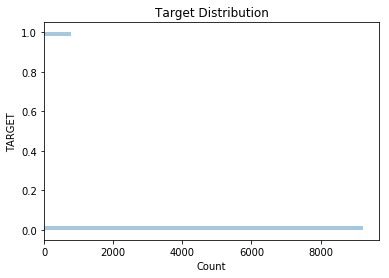

In [84]:
_ = sns.distplot(a_train['TARGET'], vertical=True, kde=False)
_ = plt.title('Target Distribution')
_ = plt.xlabel('Count')

## Handle Categorical Columns
What section should the ecoding be in?

In [85]:
cat_cols = list(a_train.select_dtypes(include='category').columns)
a_train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 100002 to 111633
Data columns (total 15 columns):
NAME_CONTRACT_TYPE             10000 non-null category
CODE_GENDER                    10000 non-null category
NAME_TYPE_SUITE                9959 non-null category
NAME_INCOME_TYPE               10000 non-null category
NAME_EDUCATION_TYPE            10000 non-null category
NAME_FAMILY_STATUS             10000 non-null category
NAME_HOUSING_TYPE              10000 non-null category
OCCUPATION_TYPE                6911 non-null category
REGION_RATING_CLIENT           10000 non-null category
REGION_RATING_CLIENT_W_CITY    10000 non-null category
WEEKDAY_APPR_PROCESS_START     10000 non-null category
ORGANIZATION_TYPE              10000 non-null category
FONDKAPREMONT_MODE             3143 non-null category
HOUSETYPE_MODE                 4995 non-null category
WALLSMATERIAL_MODE             4911 non-null category
dtypes: category(15)
memory usage: 230.9 KB


In [86]:
# print columns and their unique values

for col in cat_cols:
    print(col, ':', a_train[col].unique())

NAME_CONTRACT_TYPE : [Cash loans, Revolving loans]
Categories (2, object): [Cash loans, Revolving loans]
CODE_GENDER : [M, F]
Categories (2, object): [M, F]
NAME_TYPE_SUITE : [Unaccompanied, Family, Spouse, partner, Children, Other_A, NaN, Other_B, Group of people]
Categories (7, object): [Unaccompanied, Family, Spouse, partner, Children, Other_A, Other_B, Group of people]
NAME_INCOME_TYPE : [Working, State servant, Commercial associate, Pensioner, Unemployed]
Categories (5, object): [Working, State servant, Commercial associate, Pensioner, Unemployed]
NAME_EDUCATION_TYPE : [Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]
Categories (5, object): [Secondary / secondary special, Higher education, Incomplete higher, Lower secondary, Academic degree]
NAME_FAMILY_STATUS : [Single / not married, Married, Civil marriage, Widow, Separated]
Categories (5, object): [Single / not married, Married, Civil marriage, Widow, Separated]
NAME_HOUSING

In [87]:
# print columns and the num of unique values

for col in cat_cols:
    print(col, ':', len(a_train[col].unique()))

NAME_CONTRACT_TYPE : 2
CODE_GENDER : 2
NAME_TYPE_SUITE : 8
NAME_INCOME_TYPE : 5
NAME_EDUCATION_TYPE : 5
NAME_FAMILY_STATUS : 5
NAME_HOUSING_TYPE : 6
OCCUPATION_TYPE : 19
REGION_RATING_CLIENT : 3
REGION_RATING_CLIENT_W_CITY : 3
WEEKDAY_APPR_PROCESS_START : 7
ORGANIZATION_TYPE : 58
FONDKAPREMONT_MODE : 5
HOUSETYPE_MODE : 4
WALLSMATERIAL_MODE : 8


LABEL ENCODING: assign each unique category in a categorical variable with an integer. No new columns are created. Use for columns with only 2 categories.

ONE-HOT ENCODING: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns. Use for columns with 3+ categories.

In [88]:
# label encode categorical columns

# create a label encoder object
le = LabelEncoder()
le_count = 0

# iterate through the columns
for col in a_train.columns:
    if a_train[col].dtype.name == 'category':
        
        # If 2 or fewer unique categories
        if len(list(a_train[col].unique())) <= 2:
            
            print(col)
            
            # Train on the training data
            le.fit(a_train[col])
            
            # Transform both training and testing data
            a_train[col] = le.transform(a_train[col])
            a_test[col] = le.transform(a_test[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

NAME_CONTRACT_TYPE
CODE_GENDER
2 columns were label encoded.


In [89]:
print('Number of a_train columns prior to one-hot encoding:', a_train.shape[1])
print('Number of a_test columns prior to one-hot encoding:', a_test.shape[1])

Number of a_train columns prior to one-hot encoding: 121
Number of a_test columns prior to one-hot encoding: 120


In [90]:
# one-hot encode categorical columns

a_train = pd.get_dummies(a_train)
a_test = pd.get_dummies(a_test)

In [91]:
print('Number of a_train columns after one-hot encoding:', a_train.shape[1])
print('Number of a_test columns after one-hot encoding:', a_test.shape[1])

Number of a_train columns after one-hot encoding: 239
Number of a_test columns after one-hot encoding: 239


The a_train df should have one extra column (TARGET) than the a_test df. The reason that is not the case is that one df may have a category that the other one doesn't, so therefore, one-hot encoding creates an extra column.

In [92]:
a_train.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,1,0,0,0,0,0,0,0,1,0
100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,1,0,0,0,0,0,0
100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# align df so that each one has a 

# save the train labels for later
train_labels = a_train['TARGET']

# align the training and testing data, keep only columns present in both dataframes
a_train, a_test = a_train.align(a_test, 
                                join='inner',
                                axis = 1)

# add the target back in
a_train['TARGET'] = train_labels

print('Training Features shape: ', a_train.shape)
print('Testing Features shape: ', a_test.shape)

Training Features shape:  (10000, 238)
Testing Features shape:  (10000, 237)


In [ ]:
### Check out Days_Employed in the pdf Gentle Introduction

## <font color='green'>Application Train</font>

In [ ]:
# explore application_train data
a_train.head()

In [ ]:
# histogram plot of target values

print('In the training data, target column, there are %s 0s and %s 1s.' \
      % (a_train[a_train.TARGET==0].shape[0], a_train[a_train.TARGET==1].shape[0]))

sns.set()
_ = sns.distplot(a_train['TARGET'], kde=False)
_ = plt.ylabel('COUNT')

Due to the unbalanced nature of the target data (11x as many loans repaid as were loans not repaid), the classes (0,1) will have to be weighted to balance out the amount of each class.

### Missing Data

In [ ]:
# function to calculate missing values per column

def miss_val_df(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print(str(mis_val_table_ren_columns.shape[0]) 
          + ' out of the ' 
          + str(df.shape[1]) 
          + ' total columns have missing values.')

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [ ]:
miss_val_df(a_train).head(25)

In [ ]:
# column types
a_train.dtypes.value_counts()

In [ ]:
# number of unique values per category column
a_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0).sort_values(ascending=False)

In [ ]:
cols = a_train.columns.tolist()
print(len(cols))
a_train = pd.get_dummies(a_train)
a_train.head()

# <font color='blue'>Data Storytelling</font>

# <font color='blue'>Modeling</font>